In [1]:
%%bash
# These files appear to be from the original competition (that is unmodified)
wget -q -c https://raw.githubusercontent.com/yasminlucero/Kaggle/master/Data/compDataAsSQLiteDB/compData.db
wget -q -c https://raw.githubusercontent.com/yasminlucero/Kaggle/master/Data/compDataAsSQLiteDB/compData.sql

In [7]:
%matplotlib inline
import seaborn as sns

import sqlite3
import pandas as pd
from contextlib import closing
import numpy as np

with closing(sqlite3.connect('file:compData.db?mode=ro', uri=True)) as conn:    
    patientTranscripts = pd.read_sql_query("""
SELECT PatientGuid,
    dmIndicator,
    Gender,
    YearOfBirth,
    VisitYear,
    CASE WHEN BMI = 0 THEN NULL ELSE BMI END AS BMI,
    CASE WHEN SystolicBP = "NULL" THEN NULL ELSE SystolicBP END AS SystolicBP,
    CASE WHEN DiastolicBP = "NULL" THEN NULL ELSE DiastolicBP END AS DiastolicBP
FROM training_patientTranscript
""", conn)


#patientTranscripts.loc[patientTranscripts.Weight.isnull(), 'Weight'] = patientTranscripts.groupby('PatientGuid').Weight.transform('mean')
#patientTranscripts["Weight"] = patientTranscripts.groupby("PatientGuid").Weight.transform(lambda x: x.fillna(x.mean()))
#patientTranscripts.dropna(axis=1, how='any')

In [ ]:
# Underweight: BMI is less than 18.5.
# Normal weight: BMI is 18.5 to 24.9.
# Overweight: BMI is 25 to 29.9.
# Obese: BMI is 30 or more.
    
def translateBMI(bmi):
    if bmi <  18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal_Weight"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    else
        return "Obese"
        
        
# BLOOD PRESSURE CATEGORY   SYSTOLIC mm Hg  (upper number)	 	DIASTOLIC mm Hg (lower number)
# NORMAL	                  LESS THAN 120	               and	LESS THAN 80
# ELEVATED	                120 – 129	                   and	LESS THAN 80
# HIGH BLOOD PRESSURE
# (HYPERTENSION) STAGE 1	  130 – 139	                or 80 – 89
# HIGH BLOOD PRESSURE
# (HYPERTENSION) STAGE 2	  140 OR HIGHER	            or 90 OR HIGHER
# HYPERTENSIVE CRISIS
#                           HIGHER THAN 180	           and/or	HIGHER THAN 120
        
def translateBP(systolicBP, diastolicBP):
    if systolicBP < 120 and diastolicBP < 80:
        return "Normal"
    elif 120 <= systolicBP <= 129 and diastolicBP < 80:
        return "Elevated"
    elif 130 <= systolicBP <= 130 or 80 <= diastolicBP <= 89:
        return "Hypertension_Stage_1"
    elif 140 <= systolicBP or 90 <= diastolicBP:
        return "Hypertension_Stage_2"
    else
        return "Hypertensive_Crisis"

In [8]:
patientTranscripts = patientTranscripts.sort_values(['VisitYear'],  ascending=False)
patientTranscripts = patientTranscripts.groupby('PatientGuid', as_index=False).agg(lambda x: np.nan if x.first_valid_index() is None else x.loc[x.first_valid_index()])

patientTranscripts

,PatientGuid,dmIndicator,Gender,YearOfBirth,VisitYear,BMI,SystolicBP,DiastolicBP
0,00023761-9D8D-445B-874C-2424CC7CF620,0,M,1956,2009,27.670,122.0,76.0
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,0,F,1952,2010,22.463,128.0,82.0
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,0,F,1925,2012,16.654,80.0,60.0
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,0,M,1970,2012,28.190,125.0,75.0
4,002667F4-B9A3-4DE2-875F-8034DD637865,0,F,1928,2010,19.388,112.0,80.0
5,0029BBC8-7C22-4444-9F44-87BEF05FE033,0,F,1953,2012,26.606,121.0,72.0
6,003CEE1F-5BF5-4171-9284-F5464EC12D41,0,F,1926,2012,20.026,130.0,82.0
7,004382BD-E31F-4091-8DE5-E86A59D70C2D,0,F,1961,2011,42.864,152.0,92.0
8,004AACFF-5D67-49B3-81F4-883A72A2AB97,0,F,1985,2011,26.623,128.0,96.0
9,004CC712-BAD3-4A0E-8C9D-659F6C83A3AD,0,M,1987,2011,24.226,117.0,78.0


/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


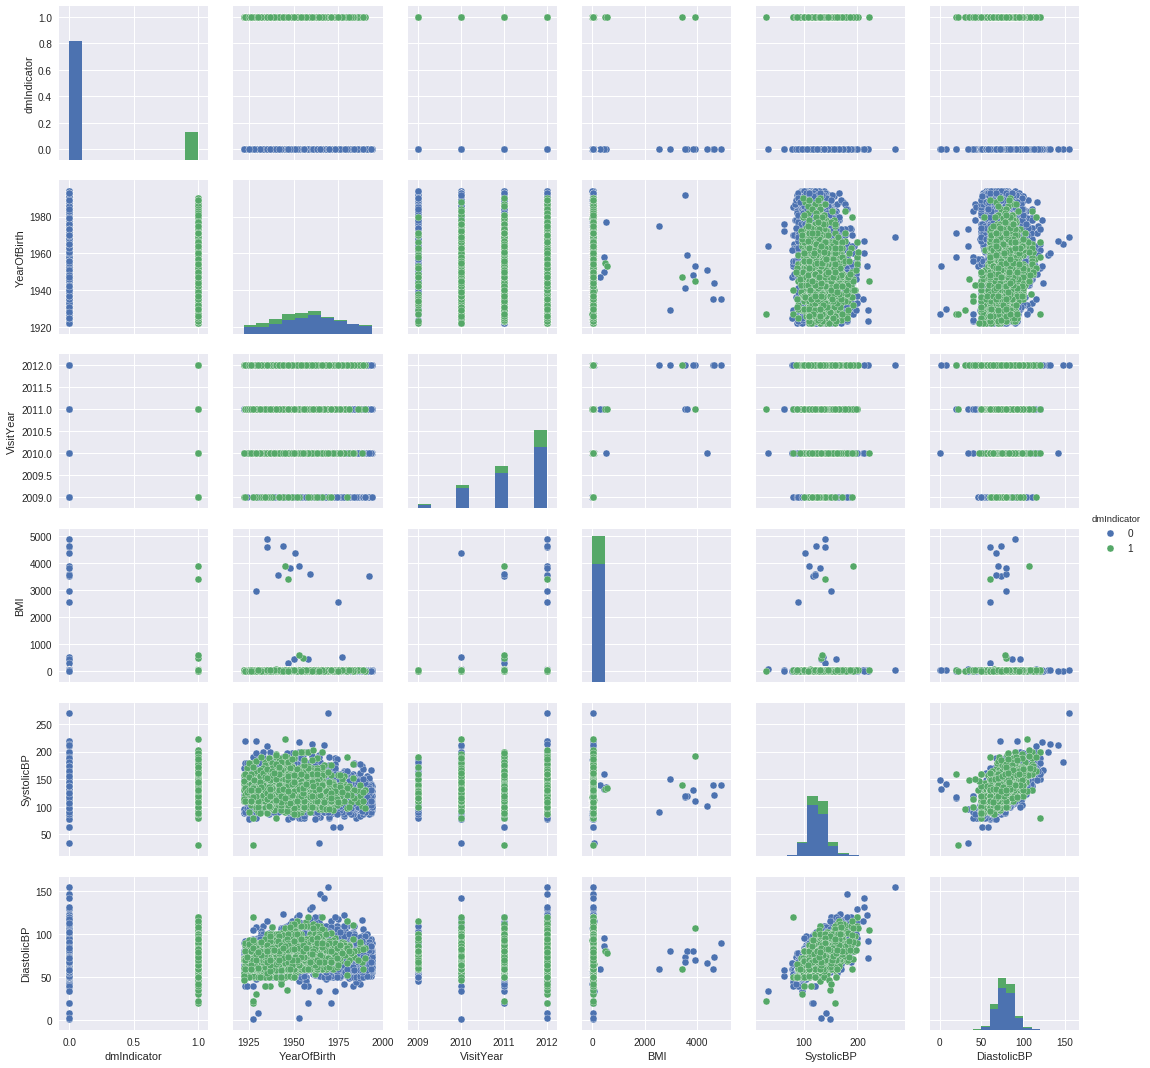

In [9]:
sns.pairplot(patientTranscripts, hue='dmIndicator');